In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [283]:
# 2 x N
points = np.random.uniform(size=(2, 5))

# 2 x M
line_start_points = np.array([[0, 0, 0], [0, 0, 0]])
line_vectors = np.array([[0, 1, 1], [1, 0, 1]])
line_end_points = line_start_points + line_vectors

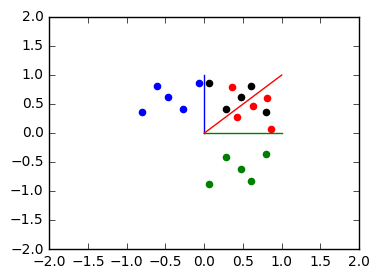

In [290]:
fig, ax = plt.subplots(figsize=(4, 3))

# add points
ax.scatter(*points, color='k')

# add lines
for start, end in zip(line_start_points.T, line_end_points.T):
    ax.plot(*list(zip(start, end)))

# set axes limits
_ = ax.set_xlim(-2, 2), ax.set_ylim(-2, 2)


R = get_reflection(points, line_start_points, line_vectors)


colors = ['b', 'g', 'r']
for m in range(3):
    for n in range(5):
        pts = R[:,n,m]
        ax.scatter(*pts, color=colors[m])

In [291]:
def get_reflection(points, line_points, line_vectors):
    
    # construct tiled vectors
    x = np.tile(points.reshape(points.shape[0], points.shape[1], 1), (1, 1, line_points.shape[1]))
    p = np.tile(line_points.reshape(line_points.shape[0], 1, line_points.shape[1]), (1, points.shape[1], 1))
    d = np.tile(line_vectors.reshape(line_vectors.shape[0], 1, line_vectors.shape[1]), (1, points.shape[1], 1))

    # instantiate dot operation
    dot = lambda a, b: np.einsum("ijk, ijk->jk", a, b)

    # compute projections NEGATIVE??????
    constants = dot(x-p, d) / dot(d, d)
    A = p + d*np.tile(constants.reshape(1, constants.shape[0], constants.shape[1]), reps=(2, 1, 1))

    #compute reflections
    R = 2*A - x
    
    return R

In [293]:
from matplotlib.path import Path

In [321]:
vertices

array([[ 0.43020826,  0.04060244,  0.5635665 ,  0.77980947],
       [ 0.26482796,  0.1685724 ,  0.93734508,  0.45543189]])

In [323]:
vertices = sort_clockwise(np.random.uniform(size=(2, 4)))

In [324]:
xydata = np.random.uniform(size=(2, 500))

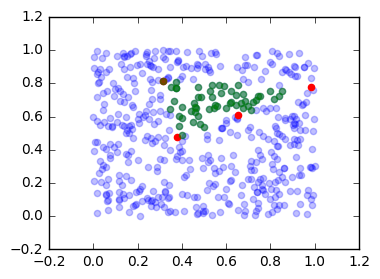

In [326]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(*xydata, color='blue', alpha=0.25)
ax.scatter(*vertices, color='red', alpha=1)


ax.scatter(*xydata.T[mask].T, color='green', alpha=0.5)

In [430]:

def get_border_regions(voronoi):
    """ Check whether each region is a border region. """
    return np.array(list(map(lambda x: -1 in x, np.take(voronoi.regions, voronoi.point_region))))


def get_bounding_points(xycoords, dilation=None):
    """
    Get points on edge of dataset, then dilate away from centroid.
    """

    if dilation is None:
        dilation = 1 + sys.float_info.epsilon

    edges = xycoords[:, get_border_regions(Voronoi(xycoords.T))]
    centroid = get_centroid_of_region(edges)
    return np.apply_along_axis(lambda x: centroid + dilation*(x-centroid), axis=0, arr=edges)


def sort_clockwise(xycoords):
    """ Returns clockwise-sorted xy coordinates. """
    return xycoords[:, np.argsort(np.arctan2(*(xycoords.T - xycoords.mean(axis=1)).T))]


def get_region_mask(xycoords, vertices):
    """
    Determines which of N points fall within region enclosed by M vertices.

    Args:
    xycoords (np array) - points to be checked, 2 x N
    vertices (np array) - vertices, 2 x M

    Returns:
    within (np array) - boolean mask, if True point is within region
    """
    path = Path(vertices.T, closed=False)
    within = path.contains_points(xycoords.T)
    return within


def get_reflection(xycoords, line_points, line_vectors):
    """
    Returns reflection of N points about M lines.

    Args:
    xycoords (np array) - N points to be reflected, 2 x N
    line_points (np array) - point on each of M lines, 2 x M
    line_vectors (np array) - vector on each of M lines, 2 x M

    Returns:
    reflection (np array) - reflection of N points about M lines, 2 x N x M
    """

    # construct tiled vectors
    x = np.tile(xycoords.reshape(xycoords.shape[0], xycoords.shape[1], 1), (1, 1, line_points.shape[1]))
    p = np.tile(line_points.reshape(line_points.shape[0], 1, line_points.shape[1]), (1, xycoords.shape[1], 1))
    d = np.tile(line_vectors.reshape(line_vectors.shape[0], 1, line_vectors.shape[1]), (1, xycoords.shape[1], 1))

    # instantiate dot operation
    dot = lambda a, b: np.einsum("ijk, ijk->jk", a, b)

    # compute projections
    projection_magnitudes = dot(x-p, d) / dot(d, d)
    projection_onto_lines = p + d*np.tile(projection_magnitudes.reshape(1, projection_magnitudes.shape[0], projection_magnitudes.shape[1]), reps=(2, 1, 1))

    #compute reflections
    reflection = 2*projection_onto_lines - x
    
    # flatten result
    return reflection.reshape(reflection.shape[0], -1)

def get_centroid_of_region(vertices):
    """
    Get centroid of a set of vertices.

    Args:
    vertices (np array) - voronoi vertices for a single region

    Returns:
    centroid (np array)
    """

    # Polygon's signed area, centroid's x and y
    A, C_x, C_y = 0, 0, 0
    for i in range(0, len(vertices) - 1):
        s = (vertices[i, 0] * vertices[i + 1, 1] - vertices[i + 1, 0] * vertices[i, 1])
        A += s
        C_x += (vertices[i, 0] + vertices[i + 1, 0]) * s
        C_y += (vertices[i, 1] + vertices[i + 1, 1]) * s
    A *= 0.5
    C_x *= (1.0 / (6.0 * A))
    C_y *= (1.0 / (6.0 * A))
    return np.array([[C_x, C_y]])

In [343]:
import sys
from scipy.spatial import Voronoi

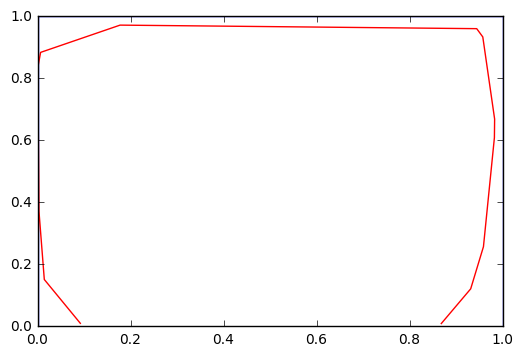

In [431]:
xycoords = np.random.uniform(size=(2, 100))
vertices_empirical = sort_clockwise(get_bounding_points(xycoords))
vertices_box = np.array([[0, 0, 1, 1], [0, 1, 1, 0]])
plt.plot(*vertices_box, color='blue')
plt.plot(*vertices_empirical, color='red')

In [432]:
vectors_empirical = get_intervertex_vectors(vertices_empirical)
vectors_box = get_intervertex_vectors(vertices_box)
reflection_empirical = get_reflection(xycoords, vertices_empirical, vectors_empirical)
reflection_box = get_reflection(xycoords, vertices_box, vectors_box)

In [440]:
voronoi = Voronoi(np.hstack((xycoords, reflection_empirical)).T)

In [445]:
mask = get_region_mask(voronoi.vertices.T, vertices_empirical)

In [493]:
regions

([183, 178, 177, 179, 182],
 [298, 140, 251, 250, 108, 297],
 [378, 181, 180, 182, 183, 377],
 [380, 113, 64, 181, 378],
 [551, 546, 548, 549, 544, 545, 547, 550],
 [545, 109, 543, 541, 544],
 [551, 377, 183, 178, 546],
 [551, 377, 378, 380, 379, 550],
 [591, 586, 113, 380, 379, 111, 112, 256, 590],
 [629, 302, 247, 248, 252, 251, 140, 141, 628],
 [633, 631, 630, 632],
 [633, 616, 301, 631],
 [633, 616, 617, 648, 632],
 [769, 766, 765, 767, 768],
 [766, 406, 407, 405, 765],
 [767, 179, 182, 180, 195, 405, 765],
 [769, 416, 406, 766],
 [837, 541, 544, 549, 835],
 [837, 541, 543, 542, 836],
 [984, 628, 141, 627, 983],
 [985, 629, 628, 984],
 [992, 301, 616, 617, 639, 991],
 [993, 985, 629, 302, 630, 631, 301, 992],
 [1237, 1235, 1236],
 [1237, 834, 250, 251, 252, 249, 1235],
 [1242, 552, 108, 250, 834, 1241],
 [1415, 981, 627, 141, 140, 298, 1414],
 [1438, 1421, 987, 982, 981, 627, 983, 1437],
 [1610, 1242, 552, 553, 554, 1609],
 [1611, 835, 549, 548, 554, 1609],
 [1614, 1241, 1242, 1610

In [480]:
for i, region in enumerate(voronoi.regions):
    if reduce(mul, mask[region], True) == True:
        print(region)

[]
[183, 178, 177, 179, 182]
[298, 140, 251, 250, 108, 297]
[378, 181, 180, 182, 183, 377]
[380, 113, 64, 181, 378]
[551, 546, 548, 549, 544, 545, 547, 550]
[545, 109, 543, 541, 544]
[551, 377, 183, 178, 546]
[551, 377, 378, 380, 379, 550]
[591, 586, 113, 380, 379, 111, 112, 256, 590]
[629, 302, 247, 248, 252, 251, 140, 141, 628]
[633, 631, 630, 632]
[633, 616, 301, 631]
[633, 616, 617, 648, 632]
[769, 766, 765, 767, 768]
[766, 406, 407, 405, 765]
[767, 179, 182, 180, 195, 405, 765]
[769, 416, 406, 766]
[837, 541, 544, 549, 835]
[837, 541, 543, 542, 836]
[984, 628, 141, 627, 983]
[985, 629, 628, 984]
[992, 301, 616, 617, 639, 991]
[993, 985, 629, 302, 630, 631, 301, 992]
[1237, 1235, 1236]
[1237, 834, 250, 251, 252, 249, 1235]
[1242, 552, 108, 250, 834, 1241]
[1415, 981, 627, 141, 140, 298, 1414]
[1438, 1421, 987, 982, 981, 627, 983, 1437]
[1610, 1242, 552, 553, 554, 1609]
[1611, 835, 549, 548, 554, 1609]
[1614, 1241, 1242, 1610]
[1614, 1241, 834, 1237, 1236, 1239, 1613]
[1629, 547, 54

In [465]:
[r for r in voronoi.regions if len(r)>0]

[[24, 14, 15, 16, 18, 17, 23],
 [29, 13, 2, 15, 14, 28],
 [31, 13, 29],
 [33, 22, 21, 3, 32],
 [56, 1, 55],
 [61, 7, 8, 60],
 [74, 72, 2, 15, 16, 73],
 [89, 85, 86, 87, 88],
 [89, 84, 33, 32, 85],
 [87, 35, 34, 81, 82, 86],
 [95, 93, 92, 91, 94],
 [98, 39, 40, 96],
 [100, 41, 97],
 [100, 41, -1, 93, 95, 99],
 [103, 97, 100, 99, 98, 96, 101],
 [103, 97, 41, -1, 102],
 [107, 105, 104, 106],
 [106, 94, 91, 104],
 [105, 42, 38, 37, 92, 91, 104],
 [107, 44, 43, 42, 105],
 [107, 44, 39, 98, 99, 95, 94, 106],
 [131, 46, 126, 130],
 [139, 136, 134, 137],
 [138, 49, 4, 133, 134, 137],
 [154, 55, 1, -1, 53, 54, 6, 153],
 [156, 57, 8, 7, 51, 52, 5, 155],
 [160, 61, 7, 51, 54, 6, 159],
 [161, 158, 59, 60, 61, 160],
 [172, 66, 10, 65, 63, 171],
 [175, 168, 171, 63, 173],
 [183, 178, 177, 179, 182],
 [195, 196, 65, 64, 181, 180],
 [174, 62, 196, 65, 63, 173],
 [203, 11, 71, 70, 69, 68, 202],
 [205, 72, 2, 13, 31, 30, 204],
 [217, 215, 214, 216],
 [216, 30, 204, 206, 25, 214],
 [215, 81, 34, 26, 25, 

In [467]:
for i, region in enumerate(voronoi.regions):
    try:
        print(reduce(mul, mask[region]))
    except:
        print(region)

False
False
False
False
[]
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
Fals

In [456]:
from operator import mul
from functools import reduce

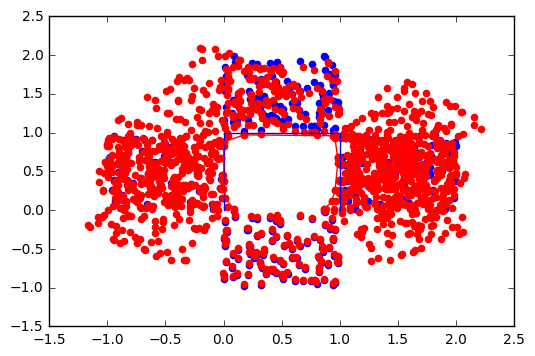

In [438]:
plt.plot(*vertices_box, color='blue')
plt.plot(*vertices_empirical, color='red')

plt.scatter(*reflection_box, color='blue')
plt.scatter(*reflection_empirical, color='red')

In [ ]:

    @staticmethod
    def filter_regions(voronoi, boundary):

        # determine whether each voronoi vertex is within the boundary
        vertex_within_boundary = get_region_mask(voronoi.vertices, boundary)
        
        [ for i, region in voronoi.regions]